# Autoencoders Tutorial
From F. Chollet's blogs.keras.io
## Simple 1-hidden layer
1 dense layer as both encoder and decoder.
We will be working on MNIST dataset, i.e. 28 x 28 = 784 points in black and white

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Encoder on its own

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Decoder on its own

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

We define the loss as binary cross-entropy (pixel by pixel) and pick the Adadelta optimizer (works with Adam too)

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Now we read and prepare the MNIST digits data. We are not interested in labels (autoencoders are not supervised).
We scale the luminosity between 0.0 and 1.0, then flatten them into  784-element vectors

In [10]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)

Train the autoencoder: input and target values are the same

In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50

 256/60000 [..............................] - ETA: 1:00 - loss: 0.6931
 5120/60000 [=>............................] - ETA: 3s - loss: 0.6816 
 9984/60000 [===>..........................] - ETA: 1s - loss: 0.6379
14592/60000 [======>.......................] - ETA: 1s - loss: 0.5637
19456/60000 [========>.....................] - ETA: 0s - loss: 0.5014
24320/60000 [===========>..................] - ETA: 0s - loss: 0.4596
29184/60000 [=============>................] - ETA: 0s - loss: 0.4306
34048/60000 [================>.............] - ETA: 0s - loss: 0.4093
38912/60000 [==================>...........] - ETA: 0s - loss: 0.3929
43776/60000 [====================>.........] - ETA: 0s - loss: 0.3798
48384/60000 [=======================>......] - ETA: 0s - loss: 0.3699
53248/60000 [=========================>....] - ETA: 0s - loss: 0.3610
58112/60000 [============================>.] - ETA: 0s - loss: 0.3537
60000/60000 [==============================] - 1s 16us/step - loss: 0.3512 - val_loss: 0.2708
Epoch 2/50

 256/60000 [..............................] - ETA: 0s - loss: 0.2708
 5120/60000 [=>............................] - ETA: 0s - loss: 0.2730
 9984/60000 [===>..........................] - ETA: 0s - loss: 0.2714
14848/60000 [======>.......................] - ETA: 0s - loss: 0.2703
19712/60000 [========>.....................] - ETA: 0s - loss: 0.2697
24576/60000 [===========>..................] - ETA: 0s - loss: 0.2686
29184/60000 [=============>................] - ETA: 0s - loss: 0.2680
34048/60000 [================>.............] - ETA: 0s - loss: 0.2676
38912/60000 [==================>...........] - ETA: 0s - loss: 0.2669
43776/60000 [====================>.........] - ETA: 0s - loss: 0.2662
48128/60000 [=======================>......] - ETA: 0s - loss: 0.2655
52736/60000 [=========================>....] - ETA: 0s - loss: 0.2647
57600/60000 [===========================>..] - ETA: 0s - loss: 0.2639
60000/60000 [==============================] - 1s 12us/step - loss: 0.2635 - val_loss: 0.2523
Epoch 3/50

 256/60000 [..............................] - ETA: 1s - loss: 0.2533
 4864/60000 [=>............................] - ETA: 0s - loss: 0.2540
 9472/60000 [===>..........................] - ETA: 0s - loss: 0.2526
14336/60000 [======>.......................] - ETA: 0s - loss: 0.2519
18944/60000 [========>.....................] - ETA: 0s - loss: 0.2503
23808/60000 [==========>...................] - ETA: 0s - loss: 0.2491
28672/60000 [=============>................] - ETA: 0s - loss: 0.2478
33280/60000 [===============>..............] - ETA: 0s - loss: 0.2467
37888/60000 [=================>............] - ETA: 0s - loss: 0.2457
42752/60000 [====================>.........] - ETA: 0s - loss: 0.2447
47616/60000 [======================>.......] - ETA: 0s - loss: 0.2438
52224/60000 [=========================>....] - ETA: 0s - loss: 0.2429
57088/60000 [===========================>..] - ETA: 0s - loss: 0.2421
60000/60000 [==============================] - 1s 12us/step - loss: 0.2416 - val_loss: 0.2293
Epoch 4/50

 256/60000 [..............................] - ETA: 0s - loss: 0.2375
 5120/60000 [=>............................] - ETA: 0s - loss: 0.2309
 9984/60000 [===>..........................] - ETA: 0s - loss: 0.2295
14848/60000 [======>.......................] - ETA: 0s - loss: 0.2288
19456/60000 [========>.....................] - ETA: 0s - loss: 0.2282
24064/60000 [===========>..................] - ETA: 0s - loss: 0.2272
28928/60000 [=============>................] - ETA: 0s - loss: 0.2265
33792/60000 [===============>..............] - ETA: 0s - loss: 0.2256
38144/60000 [==================>...........] - ETA: 0s - loss: 0.2250
43008/60000 [====================>.........] - ETA: 0s - loss: 0.2243
47872/60000 [======================>.......] - ETA: 0s - loss: 0.2235
52736/60000 [=========================>....] - ETA: 0s - loss: 0.2229
57600/60000 [===========================>..] - ETA:

Let us encode a few images, decode them again and plot them for comparison

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

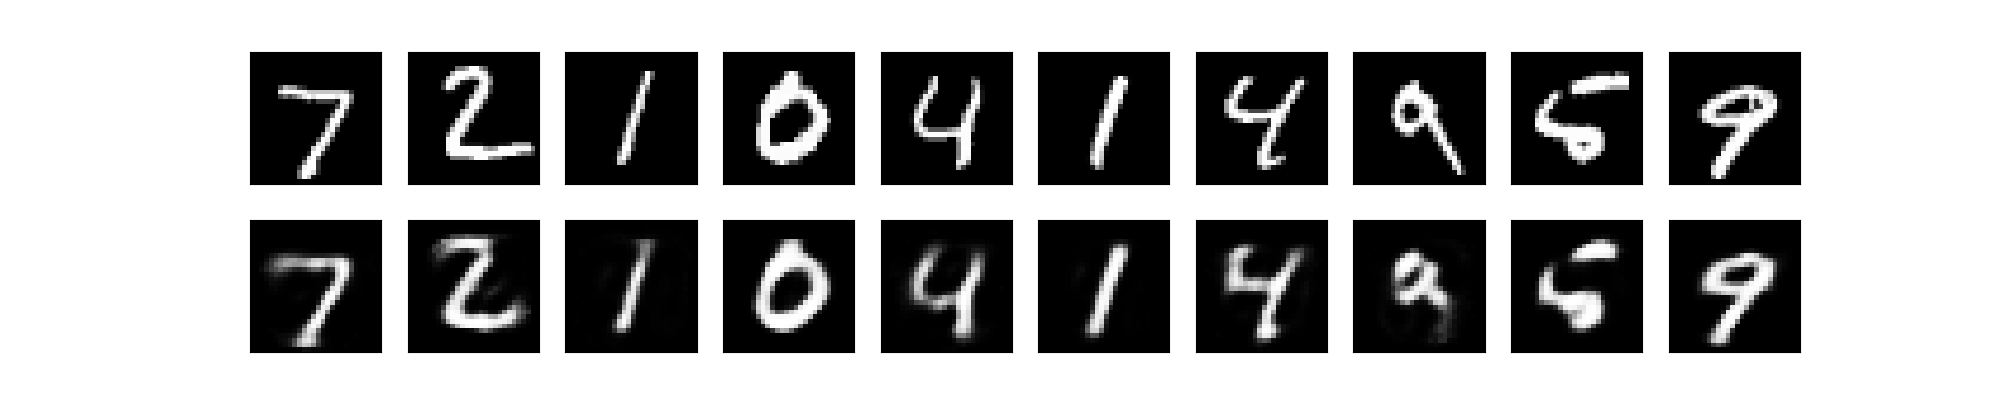

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
display()

Readable, but definitely "fuzzier".

## Deep Autoencoder
Multiple layers, descending to 32-D gradually

In [19]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [21]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100

 256/60000 [..............................] - ETA: 1:42 - loss: 0.6945
 3328/60000 [>.............................] - ETA: 8s - loss: 0.6921 
 6656/60000 [==>...........................] - ETA: 4s - loss: 0.6891
 9984/60000 [===>..........................] - ETA: 3s - loss: 0.6762
13312/60000 [=====>........................] - ETA: 2s - loss: 0.6002
16384/60000 [=======>......................] - ETA: 1s - loss: 0.5399
19456/60000 [========>.....................] - ETA: 1s - loss: 0.4977
22784/60000 [==========>...................] - ETA: 1s - loss: 0.4648
26112/60000 [============>.................] - ETA: 1s - loss: 0.4398
29440/60000 [=============>................] - ETA: 0s - loss: 0.4208
32768/60000 [===============>..............] - ETA: 0s - loss: 0.4052
35840/60000 [================>.............] - ETA: 0s - loss: 0.3933
38912/60000 [==================>...........] - ETA: 0s - loss: 0.3834
41984/60000 [===================>..........] - ETA: 0s - loss: 0.3748
45056/60000 [=====================>........] - ETA: 0s - loss: 0.3675
48128/60000 [=======================>......] - ETA: 0s - loss: 0.3608
51200/60000 [========================>.....] - ETA: 0s - loss: 0.3549
54016/60000 [==========================>...] - ETA: 0s - loss: 0.3502
57088/60000 [===========================>..] - ETA: 0s - loss: 0.3456
60000/60000 [==============================] - 2s 25us/step - loss: 0.3416 - val_loss: 0.2633
Epoch 2/100

 256/60000 [..............................] - ETA: 1s - loss: 0.2614
 3584/60000 [>.............................] - ETA: 0s - loss: 0.2622
 6656/60000 [==>...........................] - ETA: 0s - loss: 0.2615
 9728/60000 [===>..........................] - ETA: 0s - loss: 0.2617
12800/60000 [=====>........................] - ETA: 0s - loss: 0.2617
15872/60000 [======>.......................] - ETA: 0s - loss: 0.2616
18944/60000 [========>.....................] - ETA: 0s - loss: 0.2614
22272/60000 [==========>...................] - ETA: 0s - loss: 0.2611
25344/60000 [===========>..................] - ETA: 0s - loss: 0.2608
28416/60000 [=============>................] - ETA: 0s - loss: 0.2606
31488/60000 [==============>...............] - ETA: 0s - loss: 0.2602
34560/60000 [================>.............] - ETA: 0s - loss: 0.2599
37632/60000 [=================>............] - ETA: 0s - loss: 0.2597
40704/60000 [===================>..........] - ETA: 0s - loss: 0.2594
43776/60000 [====================>.........] - ETA: 0s - loss: 0.2592
46848/60000 [======================>.......] - ETA: 0s - loss: 0.2590
49920/60000 [=======================>......] - ETA: 0s - loss: 0.2586
53248/60000 [=========================>....] - ETA: 0s - loss: 0.2583
56320/60000 [===========================>..] - ETA: 0s - loss: 0.2579
59392/60000 [============================>.] - ETA: 0s - loss: 0.2576
60000/60000 [==============================] - 1s 17us/step - loss: 0.2575 - val_loss: 0.2524
Epoch 3/100

 256/60000 [..............................] - ETA: 1s - loss: 0.2528
 3584/60000 [>.............................] - ETA: 0s - loss: 0.2511
 6912/60000 [==>...........................] - ETA: 0s - loss: 0.2517
10240/60000 [====>.........................] - ETA: 0s - loss: 0.2514
13312/60000 [=====>........................] - ETA: 0s - loss: 0.2512
16384/60000 [=======>......................] - ETA: 0s - loss: 0.2510
19456/60000 [========>.....................] - ETA: 0s - loss: 0.2505
22528/60000 [==========>...................] - ETA: 0s - loss: 0.2501
25600/60000 [===========>..................] - ETA: 0s - loss: 0.2494
28928/60000 [=============>................] - ETA: 0s - loss: 0.2488
32000/60000 [===============>..............] - ETA: 0s - loss: 0.2482
35072/60000 [================>.............] - ETA: 0s - loss: 0.2477
38400/60000 [==================>...........] - ETA: 0s - loss: 0.2471
41472/60000 [===================>..........] - ETA: 0s - loss: 0.2465
44800/60000 [

In [22]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [23]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

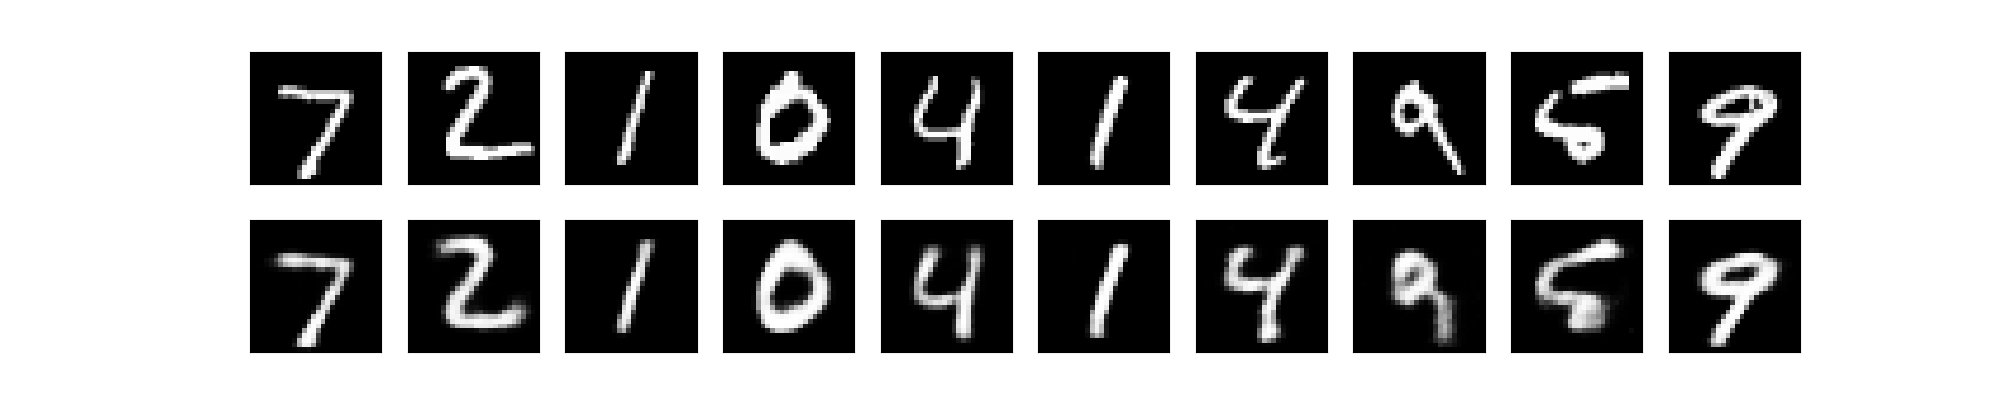

In [24]:
plt.clf()
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
display()

A bit better

## Convolutional Autoencoders
Inputs and outputs are images. It makes sense to use convolution networks

In [27]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

No need to flatten with convolution network - we can use the original pictures

In [29]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

To see progress, start a tensorboard server with tensorboard --logdir=./logs, then open http://localhost:6006.
Note that tensorboard does slow things down a bit. Recommend use of GPU.

In [31]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='./logs')]
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50

 128/60000 [..............................] - ETA: 2:17 - loss: 0.6979
 1408/60000 [..............................] - ETA: 14s - loss: 0.6225 
 2688/60000 [>.............................] - ETA: 8s - loss: 0.5514 
 3968/60000 [>.............................] - ETA: 6s - loss: 0.5094
 5248/60000 [=>............................] - ETA: 5s - loss: 0.4662
 6528/60000 [==>...........................] - ETA: 4s - loss: 0.4285
 7808/60000 [==>...........................] - ETA: 4s - loss: 0.3986
 9088/60000 [===>..........................] - ETA: 3s - loss: 0.3752
10368/60000 [====>.........................] - ETA: 3s - loss: 0.3570
11648/60000 [====>.........................] - ETA: 3s - loss: 0.3422
12928/60000 [=====>........................] - ETA: 2s - loss: 0.3296
14208/60000 [======>.......................] - ETA: 2s - loss: 0.3194
15488/60000 [======>.......................] - ETA: 2s - loss: 0.3106
16768/60000 [=======>......................] - ETA: 2s - loss: 0.3028
18048/60000 [========>.....................] - ETA: 2s - loss: 0.2959
19328/60000 [========>.....................] - ETA: 2s - loss: 0.2897
20608/60000 [=========>....................] - ETA: 2s - loss: 0.2844
21888/60000 [=========>....................] - ETA: 2s - loss: 0.2796
23168/60000 [==========>...................] - ETA: 1s - loss: 0.2752
24448/60000 [===========>..................] - ETA: 1s - loss: 0.2715
25728/60000 [===========>..................] - ETA: 1s - loss: 0.2678
27008/60000 [============>.................] - ETA: 1s - loss: 0.2646
28288/60000 [=============>................] - ETA: 1s - loss: 0.2613
29568/60000 [=============>................] - ETA: 1s - loss: 0.2585
30848/60000 [==============>...............] - ETA: 1s - loss: 0.2557
32128/60000 [===============>..............] - ETA: 1s - loss: 0.2533
33408/60000 [===============>..............] - ETA: 1s - loss: 0.2511
34688/60000 [================>.............] - ETA: 1s - loss: 0.2489
35968/60000 [================>.............] - ETA: 1s - loss: 0.2467
37248/60000 [=================>............] - ETA: 1s - loss: 0.2447
38528/60000 [==================>...........] - ETA: 1s - loss: 0.2430
39808/60000 [==================>...........] - ETA: 0s - loss: 0.2412
41088/60000 [===================>..........] - ETA: 0s - loss: 0.2394
42368/60000 [====================>.........] - ETA: 0s - loss: 0.2379
43648/60000 [====================>.........] - ETA: 0s - loss: 0.2363
44928/60000 [=====================>........] - ETA: 0s - loss: 0.2347
46080/60000 [======================>.......] - ETA: 0s - loss: 0.2334
47360/60000 [======================>.......] - ETA: 0s - loss: 0.2320
48640/60000 [=======================>......] - ETA: 0s - loss: 0.2307
49920/60000 [=======================>......] - ETA: 0s - loss: 0.2293
51200/60000 [========================>.....] - ETA: 0s - loss: 0.2280
52480/60000 [=========================>....] - ETA: 0s - loss: 0.2268
53760/60000 [=========================>....] - ETA: 0s - loss: 0.2255
55040/60000 [==========================>...] - ETA: 0s - loss: 0.2243
56320/60000 [===========================>..] - ETA: 0s - loss: 0.2231
57600/60000 [===========================>..] - ETA: 0s - loss: 0.2219
58880/60000 [============================>.] - ETA: 0s - loss: 0.2209
60000/60000 [==============================] - 3s 48us/step - loss: 0.2199 - val_loss: 0.1626
Epoch 2/50

 128/60000 [..............................] - ETA: 3s - loss: 0.1654
 1408/60000 [..............................] - ETA: 2s - loss: 0.1741
 2688/60000 [>.............................] - ETA: 2s - loss: 0.1694
 3968/60000 [>.............................] - ETA: 2s - loss: 0.1687
 5248/60000 [=>............................] - ETA: 2s - loss: 0.1687
 6528/60000 [==>...........................] - ETA: 2s - loss: 0.1682
 7808/60000 [==>...........................] - ETA: 2s - loss: 0.1680
 9088/60000 [===>..........................] - ET

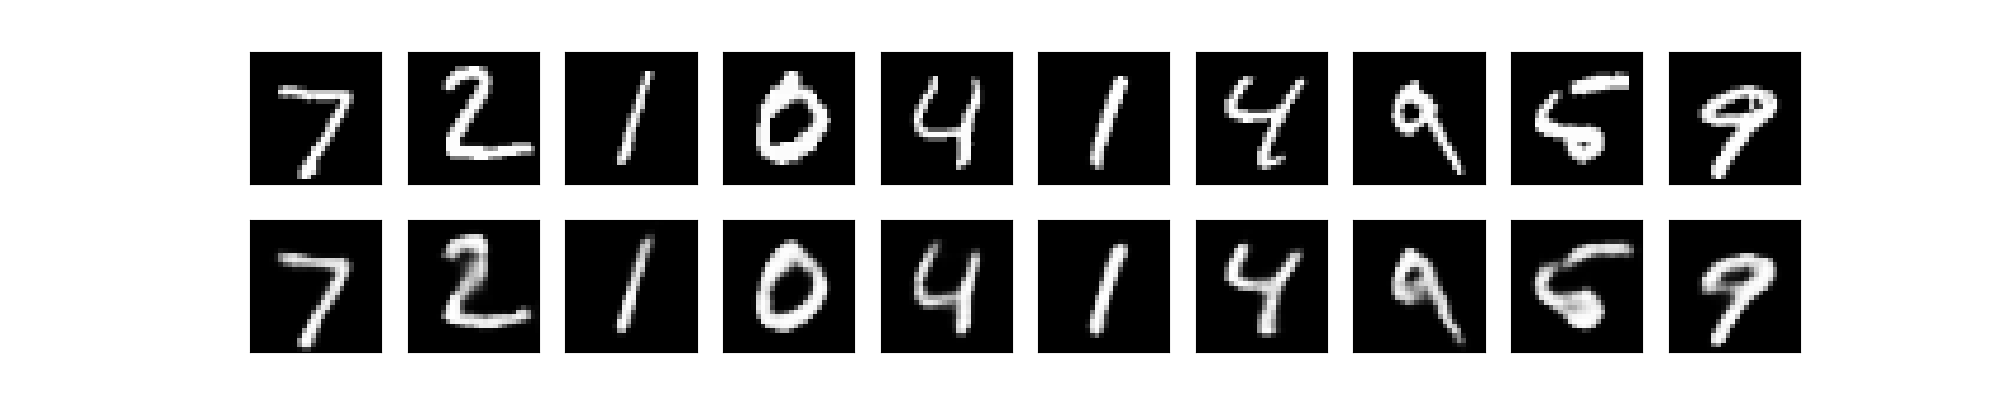

In [32]:
decoded_imgs = autoencoder.predict(x_test)
plt.clf()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
display()

A lot clearer!
Now let us have a look at the encoded images. They are tensors of 8x4x4, so we reshape them to 4x32 to display in 2D

In [35]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoded_imgs=encoder.predict(x_test)

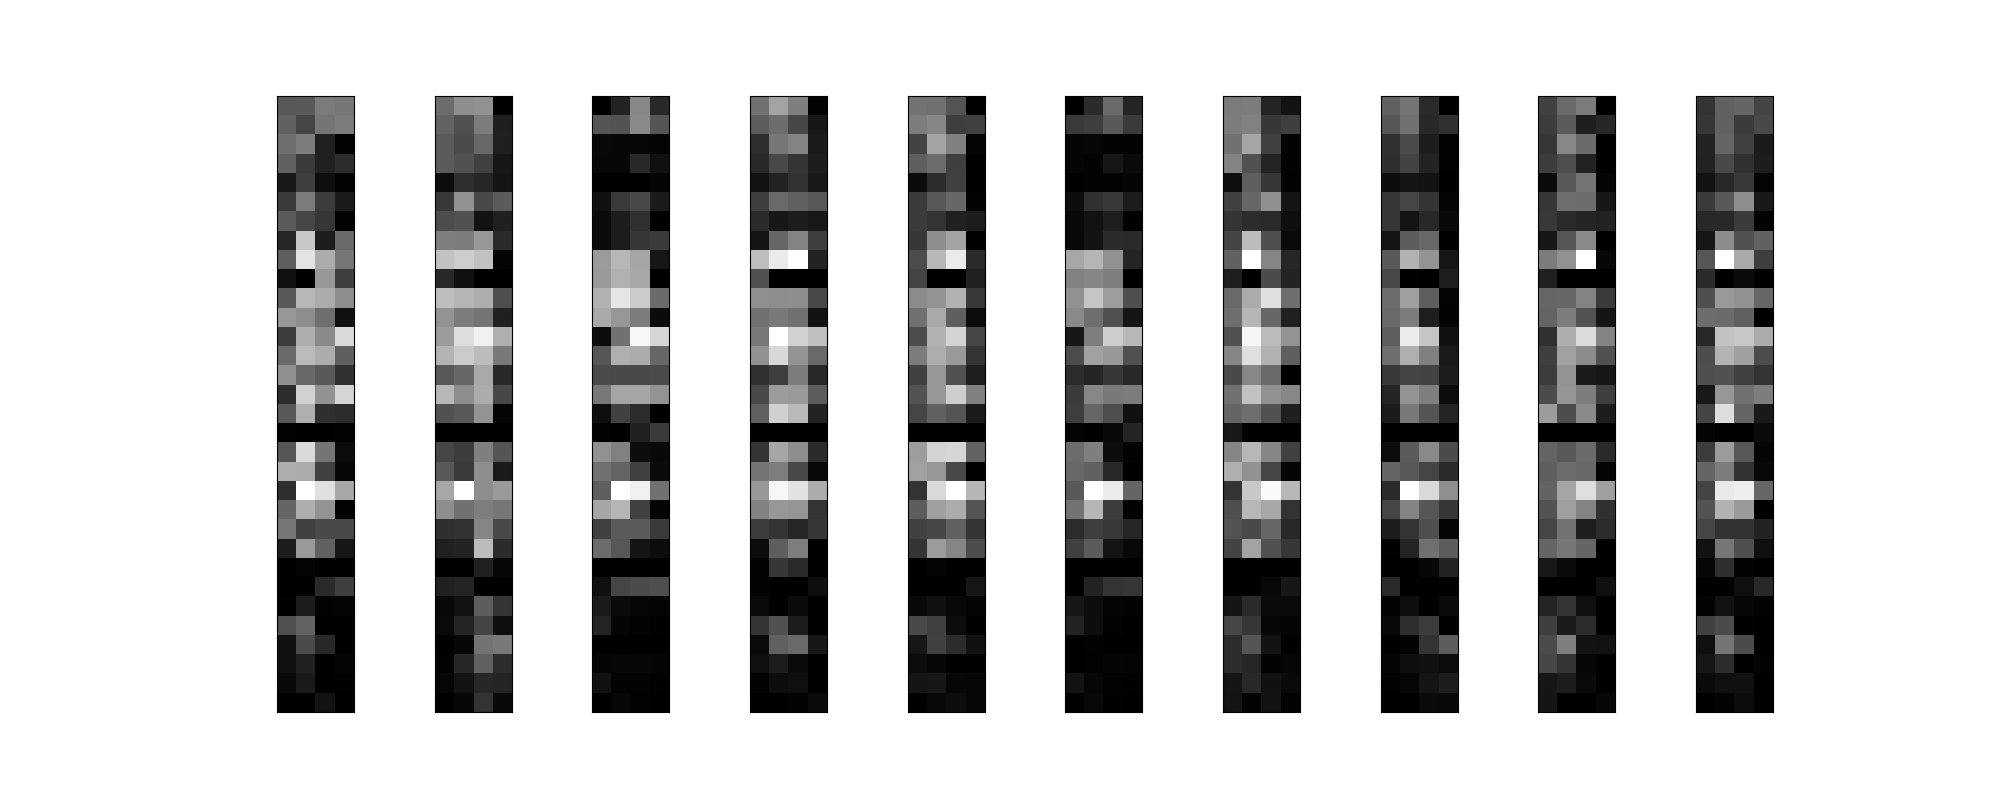

In [36]:
plt.clf()
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4*8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
display()

## Denoising Autoencoders
Let's add a gaussian noise generator to our data, then apply our convolutional autoencoder

In [39]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Plot the noisy digits

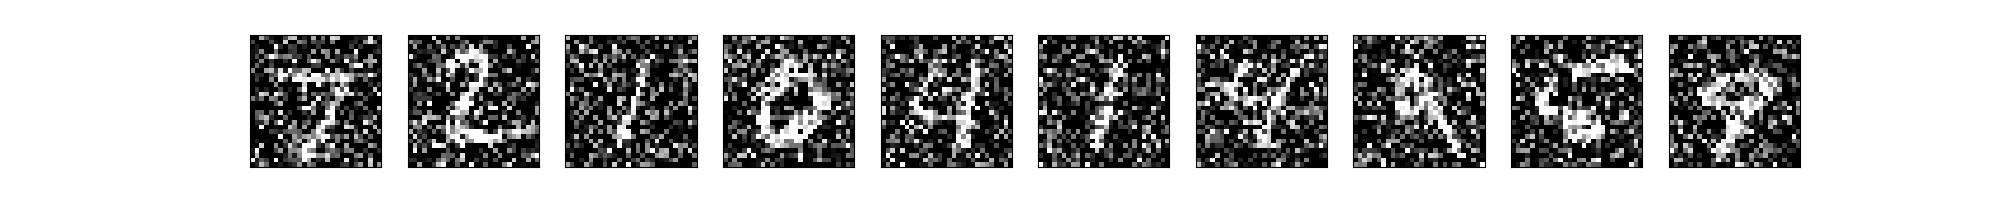

In [41]:
plt.clf()
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
display()

Build Convolutional autoencoder with more filters (32 vs. 16)

In [43]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train on noisy data

In [45]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100

 128/60000 [..............................] - ETA: 2:09 - loss: 0.6534
 1536/60000 [..............................] - ETA: 12s - loss: 0.5072 
 2944/60000 [>.............................] - ETA: 7s - loss: 0.4713 
 4352/60000 [=>............................] - ETA: 5s - loss: 0.4361
 5632/60000 [=>............................] - ETA: 4s - loss: 0.4064
 7168/60000 [==>...........................] - ETA: 3s - loss: 0.3741
 8576/60000 [===>..........................] - ETA: 3s - loss: 0.3503
 9984/60000 [===>..........................] - ETA: 3s - loss: 0.3298
11392/60000 [====>.........................] - ETA: 2s - loss: 0.3126
12928/60000 [=====>........................] - ETA: 2s - loss: 0.2971
14336/60000 [======>.......................] - ETA: 2s - loss: 0.2851
15744/60000 [======>.......................] - ETA: 2s - loss: 0.2745
17152/60000 [=======>......................] - ETA: 2s - loss: 0.2656
18560/60000 [========>.....................] - ETA: 2s - loss: 0.2578
20096/60000 [=========>....................] - ETA: 1s - loss: 0.2503
21632/60000 [=========>....................] - ETA: 1s - loss: 0.2434
23040/60000 [==========>...................] - ETA: 1s - loss: 0.2380
24576/60000 [===========>..................] - ETA: 1s - loss: 0.2325
25984/60000 [===========>..................] - ETA: 1s - loss: 0.2279
27392/60000 [============>.................] - ETA: 1s - loss: 0.2237
28928/60000 [=============>................] - ETA: 1s - loss: 0.2195
30336/60000 [==============>...............] - ETA: 1s - loss: 0.2160
31872/60000 [==============>...............] - ETA: 1s - loss: 0.2123
33408/60000 [===============>..............] - ETA: 1s - loss: 0.2089
34816/60000 [================>.............] - ETA: 1s - loss: 0.2060
36224/60000 [=================>............] - ETA: 1s - loss: 0.2034
37632/60000 [=================>............] - ETA: 0s - loss: 0.2008
39040/60000 [==================>...........] - ETA: 0s - loss: 0.1983
40576/60000 [===================>..........] - ETA: 0s - loss: 0.1958
41984/60000 [===================>..........] - ETA: 0s - loss: 0.1938
43520/60000 [====================>.........] - ETA: 0s - loss: 0.1915
44928/60000 [=====================>........] - ETA: 0s - loss: 0.1896
46336/60000 [======================>.......] - ETA: 0s - loss: 0.1878
47744/60000 [======================>.......] - ETA: 0s - loss: 0.1861
49280/60000 [=======================>......] - ETA: 0s - loss: 0.1843
50688/60000 [========================>.....] - ETA: 0s - loss: 0.1827
52224/60000 [=========================>....] - ETA: 0s - loss: 0.1811
53760/60000 [=========================>....] - ETA: 0s - loss: 0.1794
55296/60000 [==========================>...] - ETA: 0s - loss: 0.1780
56704/60000 [===========================>..] - ETA: 0s - loss: 0.1767
58112/60000 [============================>.] - ETA: 0s - loss: 0.1754
59520/60000 [============================>.] - ETA: 0s - loss: 0.1743
60000/60000 [==============================] - 3s 44us/step - loss: 0.1738 - val_loss: 0.1184
Epoch 2/100

 128/60000 [..............................] - ETA: 2s - loss: 0.1170
 1664/60000 [..............................] - ETA: 2s - loss: 0.1241
 3200/60000 [>.............................] - ETA: 2s - loss: 0.1238
 4608/60000 [=>............................] - ETA: 1s - loss: 0.1235
 6016/60000 [==>...........................] - ETA: 1s - loss: 0.1232
 7424/60000 [==>...........................] - ETA: 1s - loss: 0.1229
 8960/60000 [===>..........................] - ETA: 1s - loss: 0.1225
10368/60000 [====>.........................] - ETA: 1s - loss: 0.1225
11904/60000 [====>.........................] - ETA: 1s - loss: 0.1221
13312/60000 [=====>........................] - ETA: 1s - loss: 0.1218
14848/60000 [======>.......................] - ETA: 1s - loss: 0.1213
16384/60000 [=======>......................] - ETA: 1s - loss: 0.1212
17920/60000 [=======>......................] - 

Let's find out if we can filter out the noise

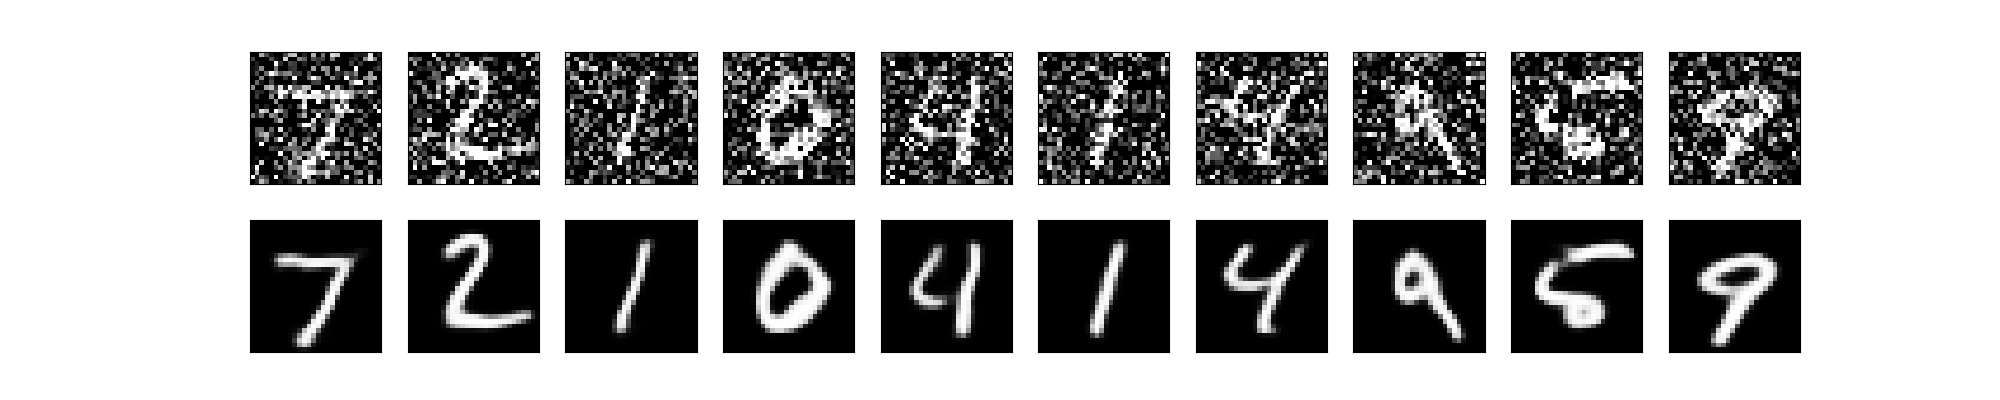

In [47]:
decoded_imgs = autoencoder.predict(x_test_noisy)
plt.clf()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
display()

## Variational Autoencoders
Encoder network maps to latent space with 2-D normal distribution, decoder samples latent space and reconstructs images

some imports

In [50]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

Utility Function

In [52]:
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector
    # Arguments:
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """
    plt.clf()

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()
    display()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.clf()
    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()
    display()

Parameters for MNIST dataset

In [54]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

Build encoder to 2D latent space

In [56]:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

Sample from latent space

In [58]:
# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
import tensorflow as tf
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments:
        args (tensor): mean and log of variance of Q(z|X)
    # Returns:
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=tf.shape(z_mean), mean=0., stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [59]:
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

Now create the encoder

In [61]:
# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
#plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

__________________________________________________________________________________________________
Layer (type) Output Shape Param # Connected to 
==================================================================================================
encoder_input (InputLayer) (None, 784) 0 
__________________________________________________________________________________________________
dense_19 (Dense) (None, 512) 401920 encoder_input[0][0] 
__________________________________________________________________________________________________
z_mean (Dense) (None, 2) 1026 dense_19[0][0] 
__________________________________________________________________________________________________
z_log_var (Dense) (None, 2) 1026 dense_19[0][0] 
__________________________________________________________________________________________________
z (Lambda) (None, 2) 0 z_mean[0][0] 
 z_log_var[0][0] 
==================================================================================================
Total params: 403,972
Trainable params: 403,972
Non-trainable params: 0
__________________________________________________________________________________________________

Build the decoder from sampled latent space to reconstruction

In [63]:
# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
#plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
z_sampling (InputLayer) (None, 2) 0 
_________________________________________________________________
dense_20 (Dense) (None, 512) 1536 
_________________________________________________________________
dense_21 (Dense) (None, 784) 402192 
=================================================================
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________

Put it all together

In [65]:
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [66]:
models = (encoder, decoder)
data = (x_test, y_test)

Define loss function as x-entropy + KL divergence (can also use mse)

In [68]:
#VAE loss = mse_loss or xent_loss + kl_loss
reconstruction_loss = mse(inputs, outputs)

In [69]:
# if you choose binary cross_entropy, you'll find a bug that prevents differentiation
#reconstruction_loss = binary_crossentropy(inputs,outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss+kl_loss)

vae.add_loss(vae_loss)

Compile the model

In [71]:
vae.compile(optimizer='adam')
vae.summary()
# plot_model(vae, to_file='vae_mlp.png', show_shapes=True)

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
encoder_input (InputLayer) (None, 784) 0 
_________________________________________________________________
encoder (Model) [(None, 2), (None, 2), (N 403972 
_________________________________________________________________
decoder (Model) (None, 784) 403728 
=================================================================
Total params: 807,700
Trainable params: 807,700
Non-trainable params: 0
_________________________________________________________________

Train the autoencoder

In [73]:
vae.fit(x_train, epochs=200, batch_size=batch_size, validation_data=(x_test, None))
vae.save_weights('vae_mlp_mnist.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/200

 128/60000 [..............................] - ETA: 4:13 - loss: 181.4967
 2304/60000 [>.............................] - ETA: 14s - loss: 129.8677 
 4480/60000 [=>............................] - ETA: 7s - loss: 100.1733 
 6528/60000 [==>...........................] - ETA: 5s - loss: 87.2902 
 8704/60000 [===>..........................] - ETA: 4s - loss: 79.2511
10880/60000 [====>.........................] - ETA: 3s - loss: 74.1418
13056/60000 [=====>........................] - ETA: 3s - loss: 70.6794
15232/60000 [======>.......................] - ETA: 2s - loss: 68.0150
17536/60000 [=======>......................] - ETA: 2s - loss: 65.7812
19584/60000 [========>.....................] - ETA: 2s - loss: 64.1427
21760/60000 [=========>....................] - ETA: 1s - loss: 62.6945
23936/60000 [==========>...................] - ETA: 1s - loss: 61.4763
26112/60000 [============>.................] - ETA: 1s - loss: 60.4049
28288/60000 [=============>................] - ETA: 1s - loss: 59.4521
30464/60000 [==============>...............] - ETA: 1s - loss: 58.5951
32640/60000 [===============>..............] - ETA: 1s - loss: 57.8385
34816/60000 [================>.............] - ETA: 0s - loss: 57.1973
36992/60000 [=================>............] - ETA: 0s - loss: 56.5876
39168/60000 [==================>...........] - ETA: 0s - loss: 55.9879
41344/60000 [===================>..........] - ETA: 0s - loss: 55.4435
43520/60000 [====================>.........] - ETA: 0s - loss: 54.9305
45568/60000 [=====================>........] - ETA: 0s - loss: 54.4868
47744/60000 [======================>.......] - ETA: 0s - loss: 54.0826
49920/60000 [=======================>......] - ETA: 0s - loss: 53.6865
52096/60000 [=========================>....] - ETA: 0s - loss: 53.3299
54272/60000 [==========================>...] - ETA: 0s - loss: 52.9847
56448/60000 [===========================>..] - ETA: 0s - loss: 52.6604
58368/60000 [============================>.] - ETA: 0s - loss: 52.4019
60000/60000 [==============================] - 2s 35us/step - loss: 52.2059 - val_loss: 44.2623
Epoch 2/200

 128/60000 [..............................] - ETA: 2s - loss: 47.0817
 2304/60000 [>.............................] - ETA: 1s - loss: 44.6081
 4480/60000 [=>............................] - ETA: 1s - loss: 44.3416
 6656/60000 [==>...........................] - ETA: 1s - loss: 44.2487
 8832/60000 [===>..........................] - ETA: 1s - loss: 44.3301
11008/60000 [====>.........................] - ETA: 1s - loss: 44.2564
13184/60000 [=====>........................] - ETA: 1s - loss: 44.2286
15360/60000 [======>.......................] - ETA: 1s - loss: 44.2647
17536/60000 [=======>......................] - ETA: 0s - loss: 44.2875
19712/60000 [========>.....................] - ETA: 0s - loss: 44.2542
21888/60000 [=========>....................] - ETA: 0s - loss: 44.1594
23936/60000 [==========>...................] - ETA: 0s - loss: 44.1180
26112/60000 [============>.................] - ETA: 0s - loss: 44.1214
28288/60000 [=============>................] - ETA: 0s - loss: 44.0797
30464/60000 [==============>...............] - ETA: 0s - loss: 44.0150
32640/60000 [===============>..............] - ETA: 0s - loss: 44.0215
34816/60000 [================>.............] - ETA: 0s - loss: 43.9630
36992/60000 [=================>............] - ETA: 0s - loss: 43.9140
39168/60000 [==================>...........] - ETA: 0s - loss: 43.8851
41344/60000 [===================>..........] - ETA: 0s - loss: 43.8588
43520/60000 [====================>.........] - ETA: 0s - loss: 43.8526
45696/60000 [=====================>........] - ETA: 0s - loss: 43.8455
47872/60000 [======================>.......] - ETA: 0s - loss: 43.8081
50048/60000 [========================>.....] - ETA: 0s - loss: 43.7956
52096/60000 [=========================>....] - ETA: 0s - loss: 43.7455
54272/60000 [==========================>...] - ETA: 0s - l

Finally plot the result!

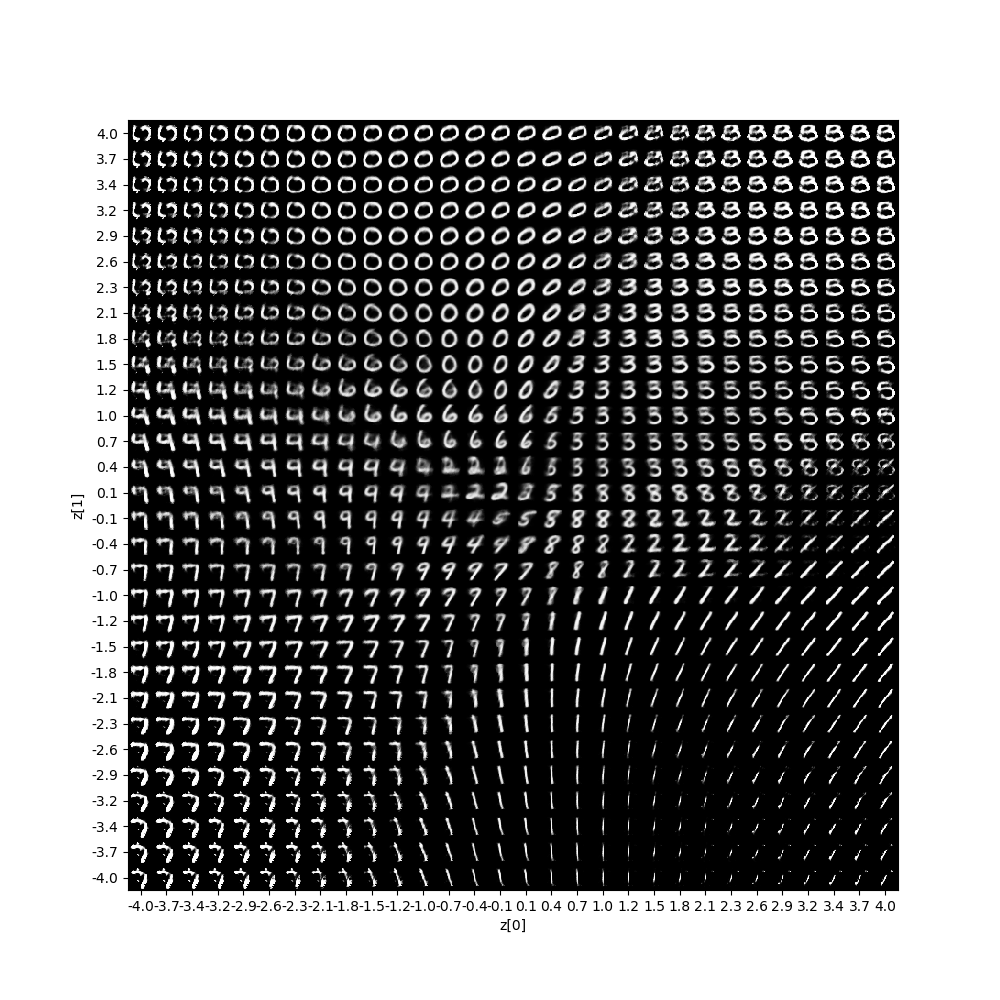

In [75]:
plot_results(models,
             data,
             batch_size=batch_size,
             model_name="vae_mlp")